In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#loaded datasets summery
print("Train:","x=",x_train.shape,"y=",y_train.shape)
print("Test:","x=",x_test.shape,"y=",y_test.shape)

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

Train: x= (60000, 28, 28) y= (60000,)
Test: x= (10000, 28, 28) y= (10000,)


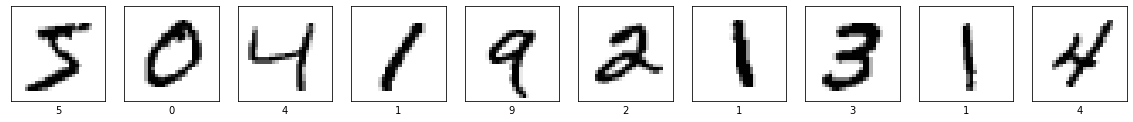

In [3]:
plt.figure(figsize=(20,2))
for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x_train[i], cmap='binary')
        plt.xticks([])
        plt.yticks([])
        # The labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(y_train[i])

In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
________________________________

C:\Users\Deepak\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 84s 41ms/step - loss: 0.1434 - accuracy: 0.9564 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0421 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0353 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0398 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0321 - val_accura

In [5]:
model.save('my_model_digits.h5')
print("Saved model to disk")

Saved model to disk


In [6]:
from tensorflow.keras.models import load_model

model=load_model('my_model_digits.h5')

In [7]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [8]:
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [24]:
# load an image and predict the class
def predict_sample():
	# load the image
	img = load_image('sample2.jpg')
	# load model
	model = load_model('my_model_digits.h5')
	# predict the class
	digit = model.predict_classes(img)
	print(digit[0])

In [25]:
# entry point, run the example
predict_sample()

2


313/313 - 4s - loss: 0.0384 - accuracy: 0.9888
0.9887999892234802


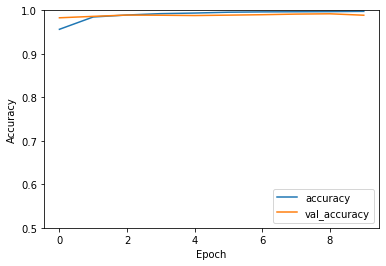

In [11]:
"""## Evaluate the model"""

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)